<a href="https://colab.research.google.com/github/asif-raza01/ML/blob/main/Polynomial_Regreesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [24]:
X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)

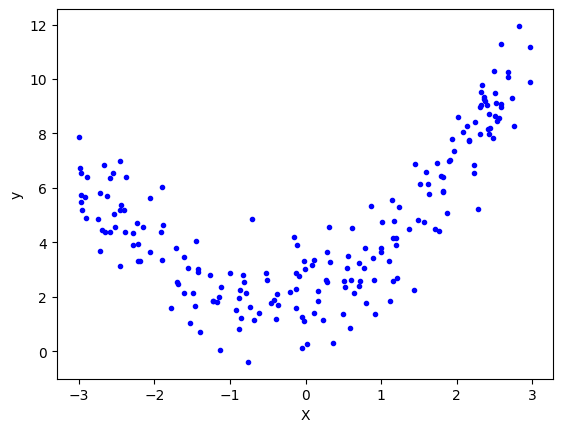

In [25]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [27]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred=lr.predict(X_test)
r2_score_lr=r2_score(y_test,y_pred)

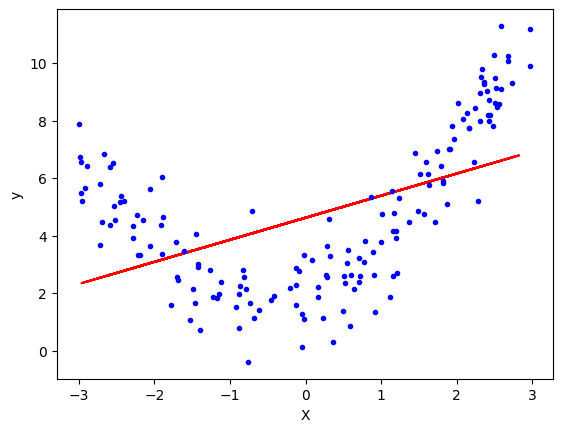

In [29]:
plt.plot(X_test,y_pred,color='r')
plt.plot(X_train,y_train,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [32]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [34]:
print(X_train[0])

[0.51430443]


In [36]:
print(X_train_trans[0])

[1.         0.51430443 0.26450904]


In [37]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [38]:
r2_score(y_test,y_pred)

0.12707603980669735

In [40]:
print(lr.coef_)

[[0.         0.82783371 0.78817303]]


In [41]:
print(lr.intercept_)

[2.0937648]


In [42]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)

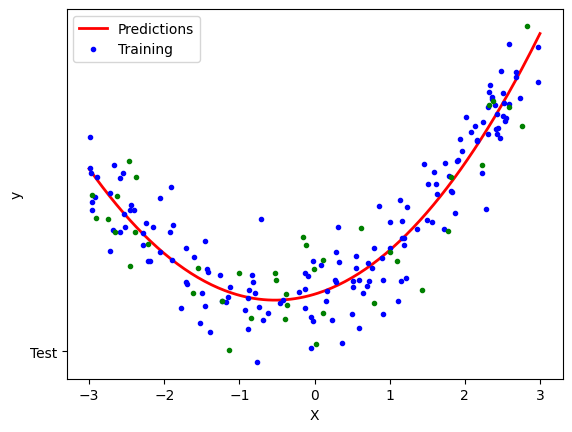

In [52]:
plt.plot(X_new,y_new,color='r',linewidth=2,label='Predictions')
plt.plot(X_train,y_train,'b.',label='Training')
plt.plot(X_test,y_test,'g.','Test')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [53]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

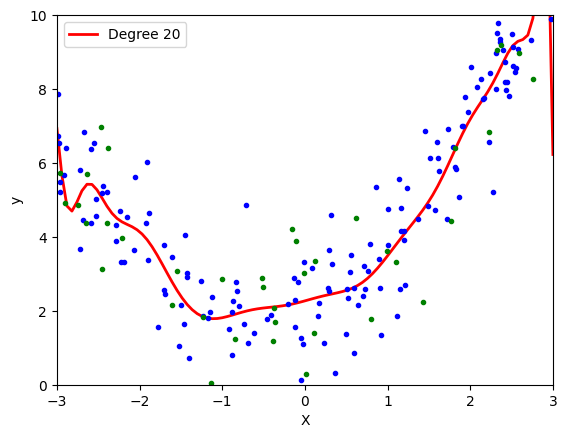

In [59]:
polynomial_regression(20)